In [16]:
import missingno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [20]:
# attrition = pd.read_csv('....csv') ???
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')

# Nowa sekcja

In [21]:
df1.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeNumber           4449 non-null   int64  
 1   Age                      4449 non-null   float64
 2   BusinessTravel           4449 non-null   object 
 3   DailyRate                4449 non-null   float64
 4   Department               4449 non-null   object 
 5   DistanceFromHome         4449 non-null   float64
 6   Education                4449 non-null   float64
 7   EducationField           4449 non-null   object 
 8   EmployeeCount            4449 non-null   float64
 9   EnvironmentSatisfaction  4449 non-null   float64
 10  Gender                   4449 non-null   object 
 11  HourlyRate               4449 non-null   float64
 12  JobInvolvement           4449 non-null   float64
 13  JobLevel                 4449 non-null   float64
 14  JobRole                 

In [23]:
df2.head()

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Over18                    4449 non-null   object 
 2   OverTime                  4449 non-null   object 
 3   PercentSalaryHike         4449 non-null   float64
 4   PerformanceRating         4449 non-null   float64
 5   RelationshipSatisfaction  4449 non-null   float64
 6   StandardHours             4449 non-null   float64
 7   StockOptionLevel          4449 non-null   float64
 8   TotalWorkingYears         4449 non-null   float64
 9   TrainingTimesLastYear     4449 non-null   float64
 10  WorkLifeBalance           4449 non-null   float64
 11  YearsAtCompany            4449 non-null   float64
 12  YearsInCurrentRole        4449 non-null   float64
 13  YearsSinceLastPromotion   4449 non-null   float64
 14  YearsWit

In [25]:
data = df1.merge(df2, how = 'inner', on = ['EmployeeNumber'])

In [26]:
data

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4445,7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4446,7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0
4447,7978,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


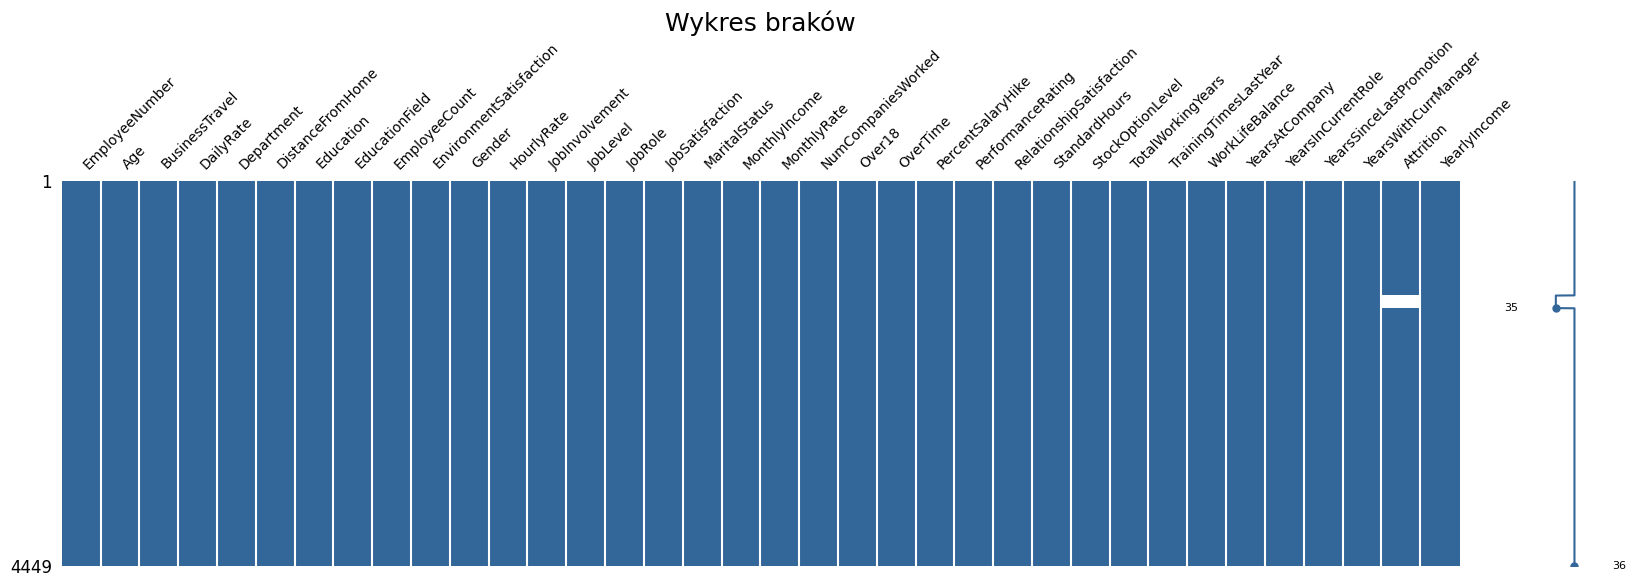

In [27]:
import missingno as msno
msno.matrix(data, figsize = (20 , 5), color = (0.2, 0.4, 0.6), fontsize = 10)
plt.title('Wykres braków', fontdict = {'fontsize':18})
plt.show()

In [28]:
test_data = data[data.isnull().any(axis = 1)]

In [29]:
data = data.dropna()

In [30]:
test_data

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
1323,100000,35.0,Travel_Rarely,1343.0,Research & Development,27.0,1.0,Medical,1.0,3.0,...,0.0,6.0,3.0,2.0,6.0,5.0,1.0,1.0,NaN,30708.0
1324,100001,27.0,Travel_Rarely,1220.0,Research & Development,5.0,3.0,Life Sciences,1.0,3.0,...,0.0,4.0,2.0,2.0,4.0,3.0,1.0,2.0,NaN,29736.0
1325,100002,24.0,Travel_Rarely,1476.0,Sales,4.0,1.0,Medical,1.0,4.0,...,2.0,5.0,3.0,3.0,5.0,4.0,0.0,3.0,NaN,49944.0
1326,100003,37.0,Non-Travel,142.0,Sales,9.0,4.0,Medical,1.0,1.0,...,1.0,9.0,6.0,3.0,9.0,5.0,7.0,7.0,NaN,106008.0
1327,100004,33.0,Travel_Rarely,527.0,Research & Development,1.0,4.0,Other,1.0,4.0,...,0.0,10.0,2.0,2.0,10.0,9.0,7.0,8.0,NaN,32232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,100142,35.0,Non-Travel,208.0,Research & Development,8.0,4.0,Life Sciences,1.0,3.0,...,1.0,15.0,5.0,3.0,14.0,11.0,2.0,9.0,NaN,49776.0
1466,100143,41.0,Travel_Rarely,582.0,Research & Development,28.0,4.0,Life Sciences,1.0,1.0,...,1.0,21.0,3.0,3.0,20.0,7.0,0.0,10.0,NaN,162840.0
1467,100144,42.0,Travel_Rarely,1396.0,Research & Development,6.0,3.0,Medical,1.0,3.0,...,1.0,18.0,3.0,4.0,13.0,7.0,5.0,7.0,NaN,160176.0
1468,100145,44.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,NaN,95736.0


In [31]:
data

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4445,7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4446,7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0
4447,7978,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


In [32]:
import plotly.express as px

In [33]:
for col in data.columns:

  if pd.api.types.is_numeric_dtype(data[col]) and col != 'EmployeeNumber':
    fig = px.box(data, y = col, color = 'Attrition')
    fig.show()

In [34]:
a = data[(data['DistanceFromHome'] > 30) | (data['Age'] > 60) | (data['TotalWorkingYears'] > 60) | (data['YearsAtCompany'] > 60) | (data['YearsInCurrentRole'] > 60) | (data['YearsSinceLastPromotion'] > 60) | (data['YearsWithCurrManager'] > 60)]

In [35]:
data = data.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)

In [36]:
data.to_csv('final_data.csv')

In [37]:
data_1 = data.drop(list(a.index))

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 0 to 4448
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4302 non-null   int64  
 1   Age                       4302 non-null   float64
 2   BusinessTravel            4302 non-null   object 
 3   DailyRate                 4302 non-null   float64
 4   Department                4302 non-null   object 
 5   DistanceFromHome          4302 non-null   float64
 6   Education                 4302 non-null   float64
 7   EducationField            4302 non-null   object 
 8   EnvironmentSatisfaction   4302 non-null   float64
 9   Gender                    4302 non-null   object 
 10  HourlyRate                4302 non-null   float64
 11  JobInvolvement            4302 non-null   float64
 12  JobLevel                  4302 non-null   float64
 13  JobRole                   4302 non-null   object 
 14  JobSatis

In [39]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2351 entries, 0 to 4432
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            2351 non-null   int64  
 1   Age                       2351 non-null   float64
 2   BusinessTravel            2351 non-null   object 
 3   DailyRate                 2351 non-null   float64
 4   Department                2351 non-null   object 
 5   DistanceFromHome          2351 non-null   float64
 6   Education                 2351 non-null   float64
 7   EducationField            2351 non-null   object 
 8   EnvironmentSatisfaction   2351 non-null   float64
 9   Gender                    2351 non-null   object 
 10  HourlyRate                2351 non-null   float64
 11  JobInvolvement            2351 non-null   float64
 12  JobLevel                  2351 non-null   float64
 13  JobRole                   2351 non-null   object 
 14  JobSatis

In [40]:
data_1


,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,4.0,Male,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,4.0,Female,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,3.0,Female,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,4.0,Female,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,3.0,Male,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425,7956,29.0,Travel_Rarely,1210.0,Sales,2.0,3.0,Medical,1.0,Male,...,2.0,10.0,2.0,3.0,0.0,0.0,0.0,0.0,Yes,79728.0
4426,7957,29.0,Travel_Rarely,1210.0,Sales,2.0,3.0,Medical,1.0,Male,...,2.0,10.0,2.0,3.0,0.0,0.0,0.0,0.0,Yes,79728.0
4427,7958,29.0,Travel_Rarely,1210.0,Sales,2.0,3.0,Medical,1.0,Male,...,2.0,10.0,2.0,3.0,0.0,0.0,0.0,0.0,Yes,79728.0
4431,7962,55.0,Travel_Rarely,725.0,Research & Development,2.0,3.0,Medical,4.0,Male,...,1.0,24.0,2.0,3.0,5.0,2.0,1.0,4.0,Yes,238308.0


In [41]:
def encode_bt(x):
  if x == 'Non-Travel':
    return 0
  elif x == 'Travel_Rarely':
    return 1
  else:
    return 2

In [42]:
data_1['BusinessTravel'] = data_1.BusinessTravel.apply(encode_bt)
data_1.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,1,852.0,Research & Development,1.0,1.0,Life Sciences,4.0,Male,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,1,397.0,Research & Development,2.0,2.0,Medical,4.0,Female,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,1,841.0,Research & Development,6.0,3.0,Other,3.0,Female,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,1,1117.0,Research & Development,8.0,2.0,Life Sciences,4.0,Female,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,1,464.0,Research & Development,4.0,2.0,Other,3.0,Male,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [43]:
temp = pd.get_dummies(data_1['OverTime'],drop_first=True)
data_1 = pd.concat([data_1, temp], axis=1)
data_1.drop("OverTime", axis=1, inplace=True)

In [44]:
temp = pd.get_dummies(data_1['Gender'],drop_first=True)
data_1 = pd.concat([data_1, temp], axis=1)
data_1.drop("Gender", axis=1, inplace=True)

In [45]:
temp = pd.get_dummies(data_1['MaritalStatus'],drop_first=True)
data_1 = pd.concat([data_1, temp], axis=1)
data_1.drop("MaritalStatus", axis=1, inplace=True)

In [46]:
def encode_dep(x):
  if x == 'Research & Development':
    return 0
  elif x == 'Sales':
    return 1
  else:
    return 2
data_1['Department'] = data_1.BusinessTravel.apply(encode_bt)
data_1.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,Yes,Male,Married,Single
0,104,30.0,1,852.0,2,1.0,1.0,Life Sciences,4.0,55.0,...,10.0,8.0,3.0,0.0,No,61512.0,1,1,1,0
1,1638,38.0,1,397.0,2,2.0,2.0,Medical,4.0,54.0,...,5.0,4.0,0.0,2.0,No,93072.0,1,0,1,0
2,164,26.0,1,841.0,2,6.0,3.0,Other,3.0,46.0,...,5.0,4.0,4.0,3.0,No,28416.0,0,0,1,0
3,395,28.0,1,1117.0,2,8.0,2.0,Life Sciences,4.0,66.0,...,5.0,3.0,0.0,2.0,No,39720.0,0,0,0,1
4,53,35.0,1,464.0,2,4.0,2.0,Other,3.0,75.0,...,1.0,0.0,0.0,0.0,No,23412.0,0,1,0,0


In [47]:
# na leniwy label encoding
no, unique = pd.factorize(data_1['EducationField'])
data_1['EducationField'] = pd.factorize(data_1['EducationField'])[0]

In [48]:
w = data_1.groupby('Attrition').mean(numeric_only=True)
temp = data_1.mean(numeric_only=True)
w.loc['All'] = temp
w = w[['EnvironmentSatisfaction',
       'JobSatisfaction',
       'JobInvolvement',
       'RelationshipSatisfaction',
       'PerformanceRating',
       'WorkLifeBalance']]
w = w.reset_index()
w

,Attrition,EnvironmentSatisfaction,JobSatisfaction,JobInvolvement,RelationshipSatisfaction,PerformanceRating,WorkLifeBalance
0,No,2.749827,2.784381,2.769869,2.766413,3.147892,2.781617
1,Yes,2.654867,2.617257,2.722345,2.748894,3.140487,2.769912
2,All,2.713313,2.720119,2.751595,2.759677,3.145045,2.777116


In [49]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2351 entries, 0 to 4432
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            2351 non-null   int64  
 1   Age                       2351 non-null   float64
 2   BusinessTravel            2351 non-null   int64  
 3   DailyRate                 2351 non-null   float64
 4   Department                2351 non-null   int64  
 5   DistanceFromHome          2351 non-null   float64
 6   Education                 2351 non-null   float64
 7   EducationField            2351 non-null   int64  
 8   EnvironmentSatisfaction   2351 non-null   float64
 9   HourlyRate                2351 non-null   float64
 10  JobInvolvement            2351 non-null   float64
 11  JobLevel                  2351 non-null   float64
 12  JobRole                   2351 non-null   object 
 13  JobSatisfaction           2351 non-null   float64
 14  MonthlyI

In [50]:
data_1['JobRole']

0        Laboratory Technician
1       Manufacturing Director
2           Research Scientist
3           Research Scientist
4        Laboratory Technician
                 ...          
4425           Sales Executive
4426           Sales Executive
4427           Sales Executive
4431                   Manager
4432                   Manager
Name: JobRole, Length: 2351, dtype: object

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [52]:
import pandas as pd
import matplotlib.ticker as ticker

In [53]:
data_1.drop('JobRole', axis=1, inplace=True)

In [54]:
y = data_1.pop('Attrition')
X = data_1

In [55]:
X.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,Yes,Male,Married,Single
0,104,30.0,1,852.0,2,1.0,1.0,0,4.0,55.0,...,2.0,10.0,8.0,3.0,0.0,61512.0,1,1,1,0
1,1638,38.0,1,397.0,2,2.0,2.0,1,4.0,54.0,...,4.0,5.0,4.0,0.0,2.0,93072.0,1,0,1,0
2,164,26.0,1,841.0,2,6.0,3.0,2,3.0,46.0,...,2.0,5.0,4.0,4.0,3.0,28416.0,0,0,1,0
3,395,28.0,1,1117.0,2,8.0,2.0,0,4.0,66.0,...,3.0,5.0,3.0,0.0,2.0,39720.0,0,0,0,1
4,53,35.0,1,464.0,2,4.0,2.0,2,3.0,75.0,...,3.0,1.0,0.0,0.0,0.0,23412.0,0,1,0,0


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [58]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2351 entries, 0 to 4432
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            2351 non-null   int64  
 1   Age                       2351 non-null   float64
 2   BusinessTravel            2351 non-null   int64  
 3   DailyRate                 2351 non-null   float64
 4   Department                2351 non-null   int64  
 5   DistanceFromHome          2351 non-null   float64
 6   Education                 2351 non-null   float64
 7   EducationField            2351 non-null   int64  
 8   EnvironmentSatisfaction   2351 non-null   float64
 9   HourlyRate                2351 non-null   float64
 10  JobInvolvement            2351 non-null   float64
 11  JobLevel                  2351 non-null   float64
 12  JobSatisfaction           2351 non-null   float64
 13  MonthlyIncome             2351 non-null   float64
 14  MonthlyR

In [59]:
dt = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy')
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)

In [60]:
def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

In [61]:
def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [62]:
def plot_confusion_matrix(cm, classes, title=None, title_appendix = '', cmap = plt.cm.Blues):

    if title_appendix:
        title_appendix = f'({title_appendix})'

    if title is None:
        title = f'Confusion Matrix {title_appendix}'

    fig, ax = plt.subplots(figsize = (10,5))

    img = ax.imshow(cm, cmap = cmap)

    ax.figure.colorbar(img, ax = ax)

    # Określanie lokalizacji ticków
    ticks = np.arange(len(classes))
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    # Ustawienie lokalizatora
    ax.xaxis.set_major_locator(ticker.FixedLocator(ticks))
    ax.yaxis.set_major_locator(ticker.FixedLocator(ticks))

    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

    fmt = '.2f' if cm.dtype =='float' else 'd'

    for y, row in enumerate(cm):
        for x, cell in enumerate(row):
            ax.text(x,y, format(cell, fmt), ha ='center', color = 'white' if cell > cm.max()/2 else 'black')

    # Teraz możemy bezpiecznie użyć set_xticklabels() i set_yticklabels()
    ax.set_xticklabels(classes, rotation = 90)
    ax.set_yticklabels(classes, rotation = 0)

    return ax

def normalize_confusion_matrix(confusion_matrix):
    return confusion_matrix.astype('float') /confusion_matrix.sum(axis = 1)[np.newaxis].T

In [63]:
from sklearn.metrics import confusion_matrix
print_results(calculate_metrics(y_train, y_pred_train))
print_results(calculate_metrics(y_test, y_pred))

#plot_confusion_matrix(confusion_matrix(y_train, y_pred_train), data_1, title_appendix = 'train');
#plot_confusion_matrix(confusion_matrix(y_test, y_pred), data_1, title_appendix = 'test');

Results for classifier
----
  Accuracy:  0.7978723404255319
  Precision: 0.7876946956202338
  Recall:    0.7986864488333089
  F1 score:  0.791037791037791
  Mislabeled 380 out of 1880


Results for classifier
----
  Accuracy:  0.7452229299363057
  Precision: 0.7405420054200542
  Recall:    0.7536483139645647
  F1 score:  0.7402764502610102
  Mislabeled 120 out of 471




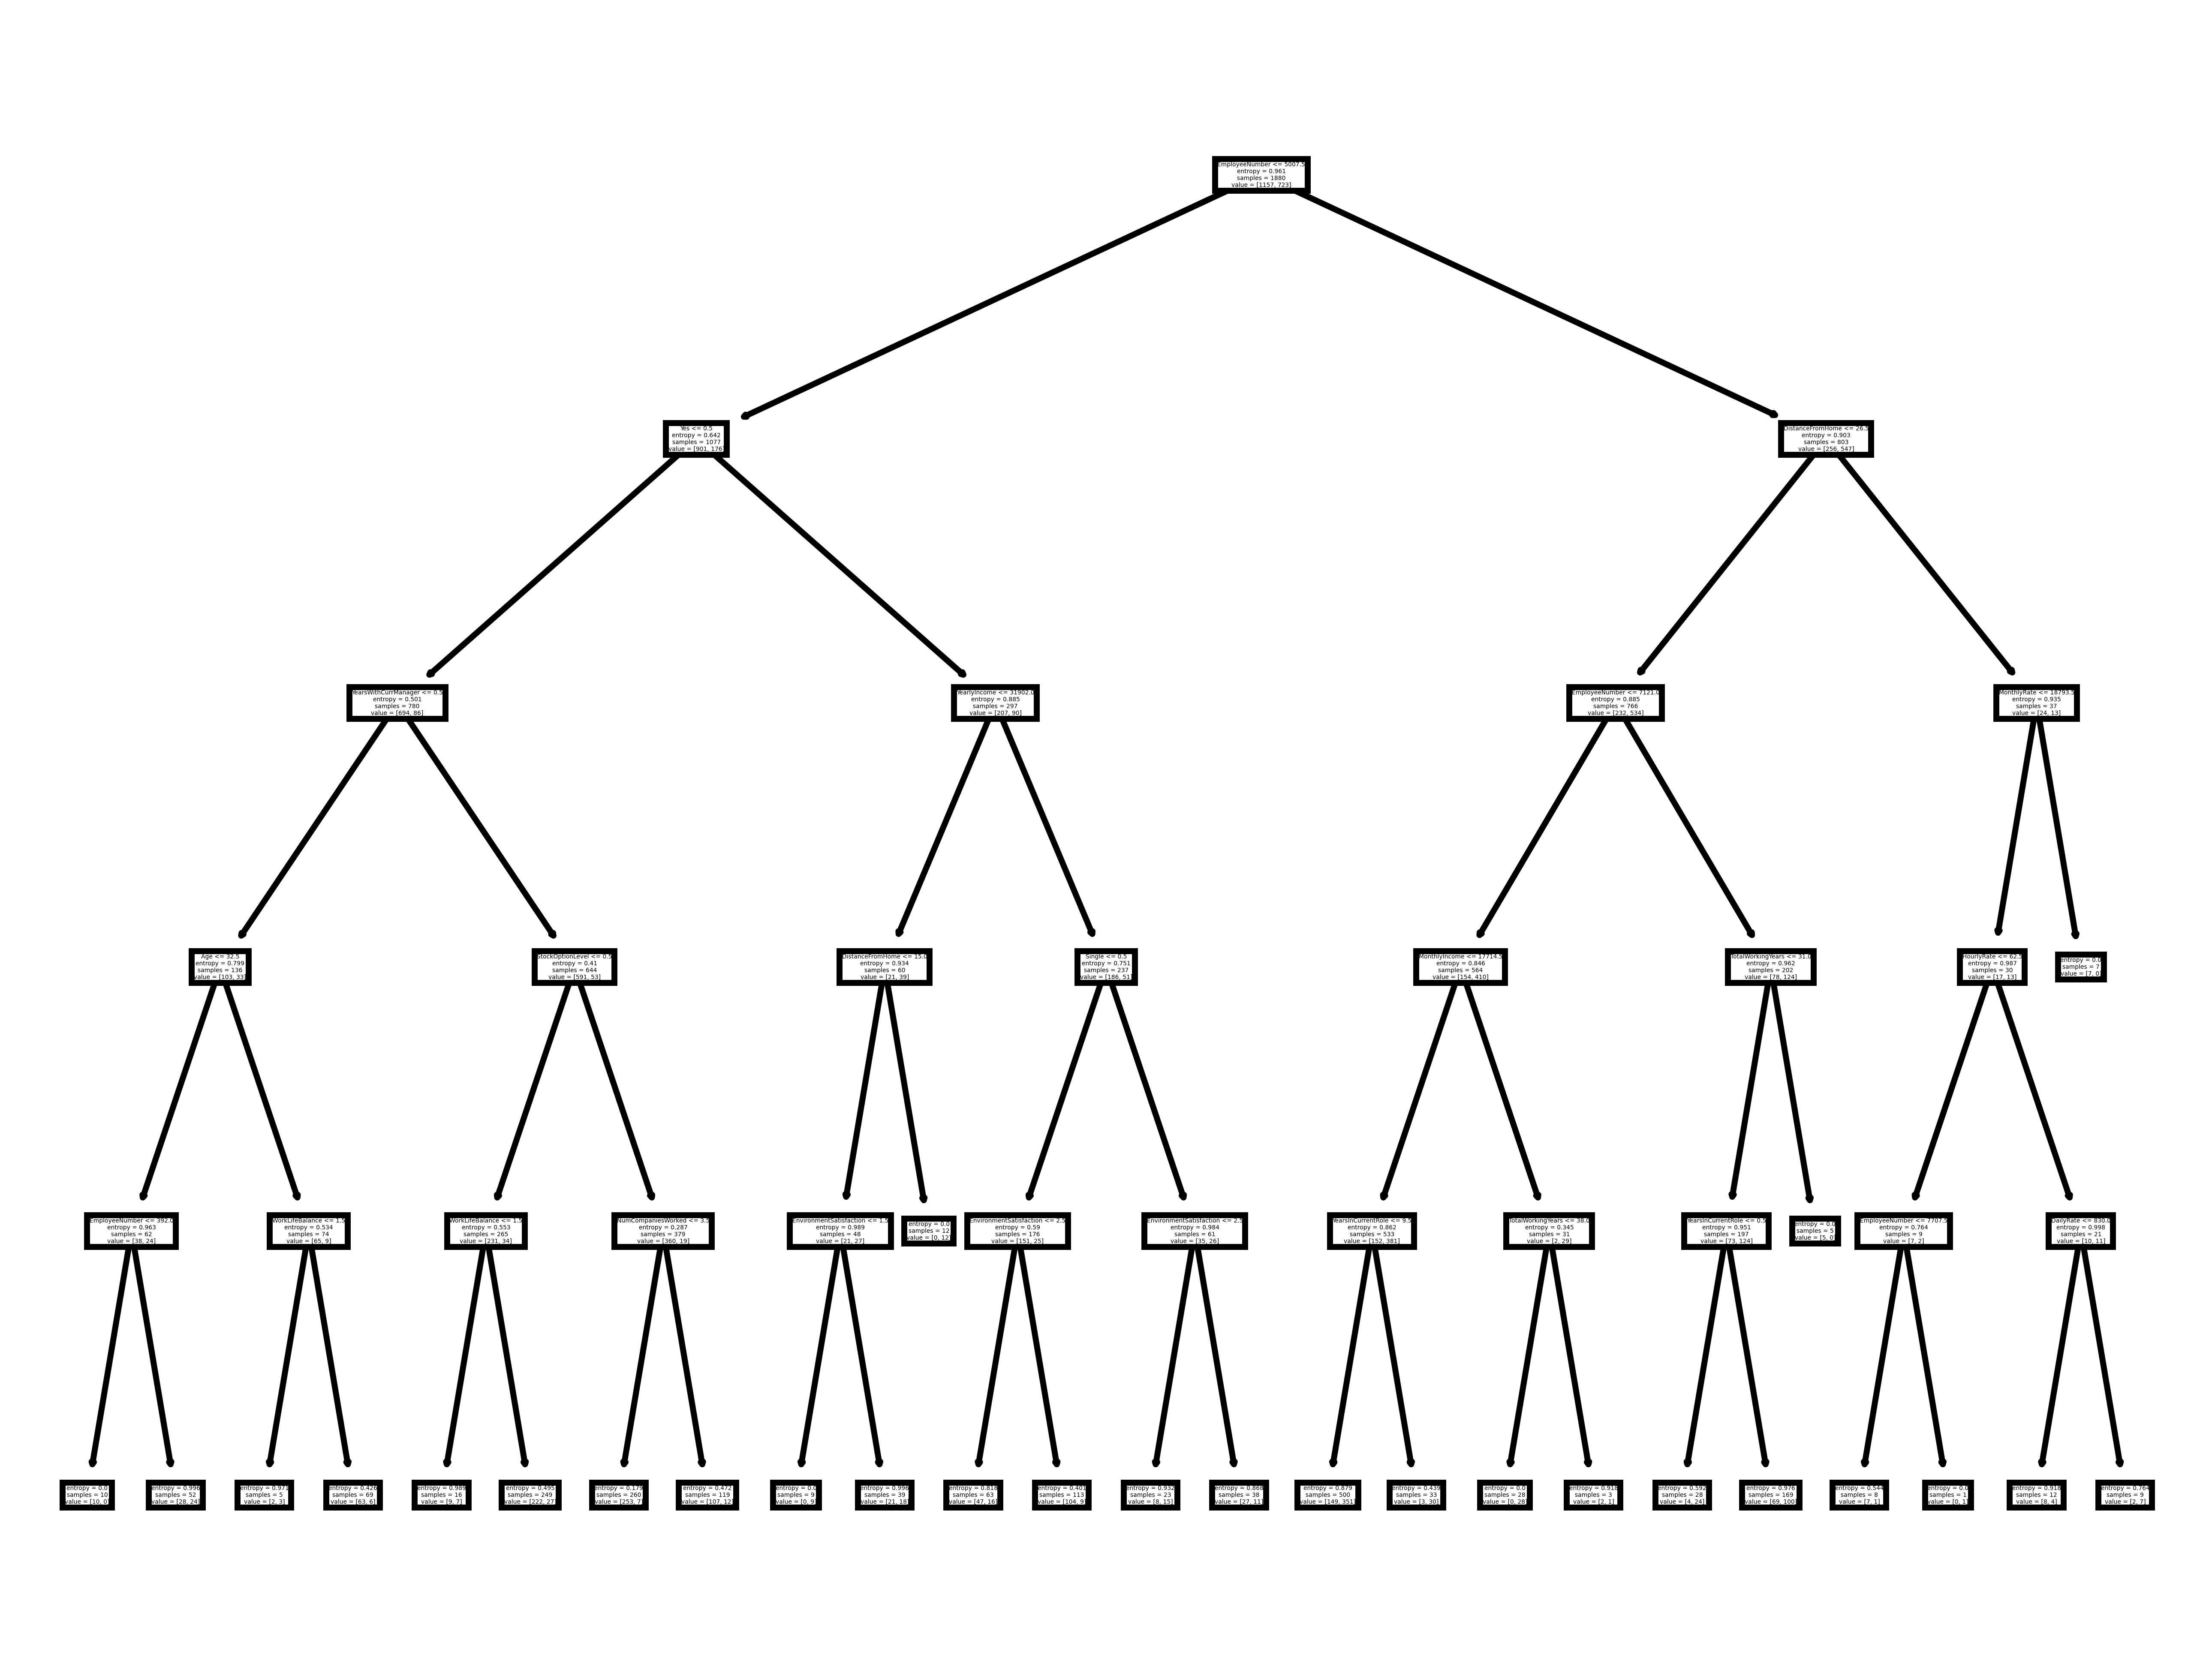

In [64]:
plt.figure(dpi=1000)
plot_tree(dt, feature_names = X.columns)
plt.show()

Random Forest

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_results(calculate_metrics(y_test, y_pred))

Results for classifier
----
  Accuracy:  0.7537154989384289
  Precision: 0.7400292397660819
  Recall:    0.7345875404839017
  F1 score:  0.73692218798151
  Mislabeled 116 out of 471


